# Photon flux around M dwarf stars vs the experimental setup


# Import Modules

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy.visualization import quantity_support
from astropy.constants import h, c
import astropy.units as u
from astropy.coordinates import Distance
from matplotlib.ticker import LogLocator, NullFormatter

# MUSCLES Spectra for different stars

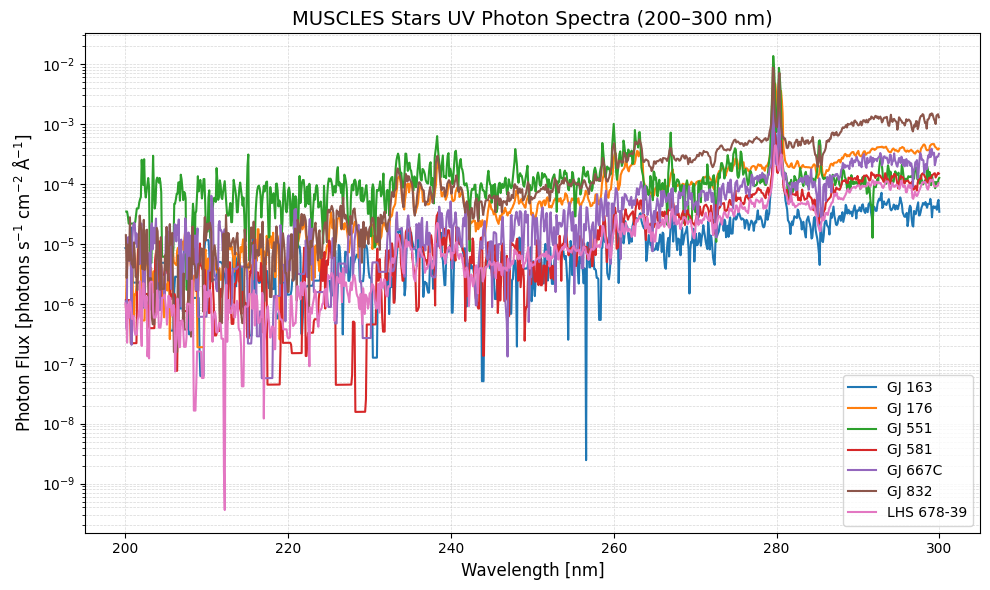

In [5]:
# Define folders and corresponding FITS filenames
folder = './MAST_2025-07-03T0803/HLSP'
star_info = {
    # "GJ 1214": f"{folder}/hlsp_muscles_gj1214/hlsp_muscles_multi_multi_gj1214_broadband_v22_adapt-const-res-sed.fits",
    "GJ 163": f"{folder}/hlsp_muscles_gj163/hlsp_muscles_multi_multi_gj163_broadband_v25_adapt-const-res-sed.fits",
    "GJ 176": f"{folder}/hlsp_muscles_gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_adapt-const-res-sed.fits",
    # "GJ 436": f"{folder}/hlsp_muscles_gj436/hlsp_muscles_multi_multi_gj436_broadband_v22_adapt-const-res-sed.fits",
    "GJ 551": f"{folder}/hlsp_muscles_gj551/hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits",
    "GJ 581": f"{folder}/hlsp_muscles_gj581/hlsp_muscles_multi_multi_gj581_broadband_v22_adapt-const-res-sed.fits",
    "GJ 667C": f"{folder}/hlsp_muscles_gj667c/hlsp_muscles_multi_multi_gj667c_broadband_v22_adapt-const-res-sed.fits",
    "GJ 832": f"{folder}/hlsp_muscles_gj832/hlsp_muscles_multi_multi_gj832_broadband_v22_adapt-const-res-sed.fits",
    # "GJ 849": f"{folder}/hlsp_muscles_gj849/hlsp_muscles_multi_multi_gj849_broadband_v25_adapt-const-res-sed.fits",
    "LHS 678-39": f"{folder}/hlsp_muscles_l-678-39/hlsp_muscles_multi_multi_l-678-39_broadband_v24_adapt-const-res-sed.fits",
    # "TRAPPIST-1": f"{folder}/hlsp_muscles_trappist-1/hlsp_muscles_multi_multi_trappist-1_broadband_v25_adapt-const-res-sed.fits",
    # "V-Eps Eri": f"{folder}/hlsp_muscles_v-eps-eri/hlsp_muscles_multi_multi_v-eps-eri_broadband_v22_adapt-const-res-sed.fits",
}

# Physical constant
hc = (h * c).to('erg * cm').value  # erg·cm

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through each star
for label, filepath in star_info.items():
    if not os.path.isfile(filepath):
        print(f"File not found: {filepath}")
        continue

    with fits.open(filepath) as hdulist:
        data = hdulist[1].data
        wavelength_angstrom = data['WAVELENGTH']
        flux_erg = data['FLUX']
        uncertainty_erg = data['ERROR']

        wavelength_nm = wavelength_angstrom / 10.0
        wavelength_cm = wavelength_angstrom * 1e-8

        # Convert energy flux to photon flux
        photon_flux = (flux_erg * wavelength_cm) / hc
        photon_uncertainty = (uncertainty_erg * wavelength_cm) / hc

        # Filter to 200–300 nm
        mask = (wavelength_nm >= 200) & (wavelength_nm <= 300)
        wl = wavelength_nm[mask]
        pf = photon_flux[mask]
        pf_err = photon_uncertainty[mask]

        # Plot
        plt.plot(wl, pf, label=label)
        # plt.fill_between(wl, pf - pf_err, pf + pf_err, alpha=0.3)

# Formatting
plt.xlabel("Wavelength [nm]", fontsize=12)
plt.ylabel("Photon Flux [photons s$^{-1}$ cm$^{-2}$ Å$^{-1}$]", fontsize=12)
plt.title("MUSCLES Stars UV Photon Spectra (200–300 nm)", fontsize=14)
plt.yscale("log")
plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



# Proxima Centauri GJ 551

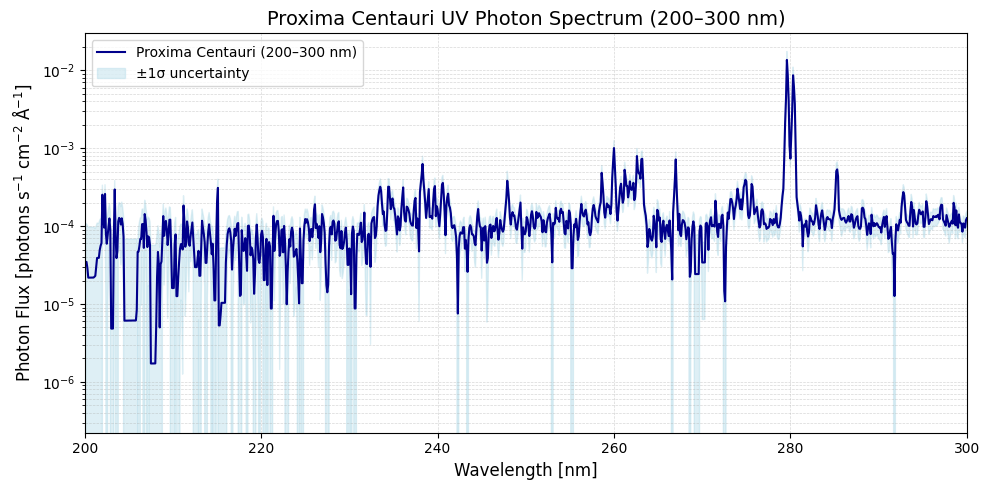

In [26]:
# Load MUSCLES spectrum
# filename = "hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits"
filename=f"{folder}/hlsp_muscles_gj551/hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits"
hdulist = fits.open(filename)
data = hdulist[1].data

# Extract wavelength and flux
wavelength_angstrom = data['WAVELENGTH']                  # in Å
flux_erg = data['FLUX']                                   # in erg s^-1 cm^-2 Å^-1
uncertainty_erg = data['ERROR']

# Convert wavelength to nm and cm
wavelength_nm = wavelength_angstrom / 10.0
wavelength_cm = wavelength_angstrom * 1e-8

# Convert energy flux to photon flux (photons s^-1 cm^-2 Å^-1)
# Photon flux = (flux * wavelength) / (h * c)
hc = (h * c).to('erg * cm')  # erg·cm
photon_flux = (flux_erg * wavelength_cm) / hc.value
photon_uncertainty = (uncertainty_erg * wavelength_cm) / hc.value

# Filter for 200–300 nm
mask = (wavelength_nm >= 200) & (wavelength_nm <= 300)
wavelength_plot = wavelength_nm[mask]
photon_flux_plot = photon_flux[mask]
photon_uncertainty_plot = photon_uncertainty[mask]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(wavelength_plot, photon_flux_plot, color='darkblue', label='Proxima Centauri (200–300 nm)')
plt.fill_between(wavelength_plot,
                 photon_flux_plot - photon_uncertainty_plot,
                 photon_flux_plot + photon_uncertainty_plot,
                 color='lightblue', alpha=0.4, label='±1σ uncertainty')

# Axes and labels
plt.xlim(200,300)
plt.xlabel("Wavelength [nm]", fontsize=12)
plt.ylabel("Photon Flux [photons s$^{-1}$ cm$^{-2}$ Å$^{-1}$]", fontsize=12)
plt.title("Proxima Centauri UV Photon Spectrum (200–300 nm)", fontsize=14)
plt.yscale("log")
plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

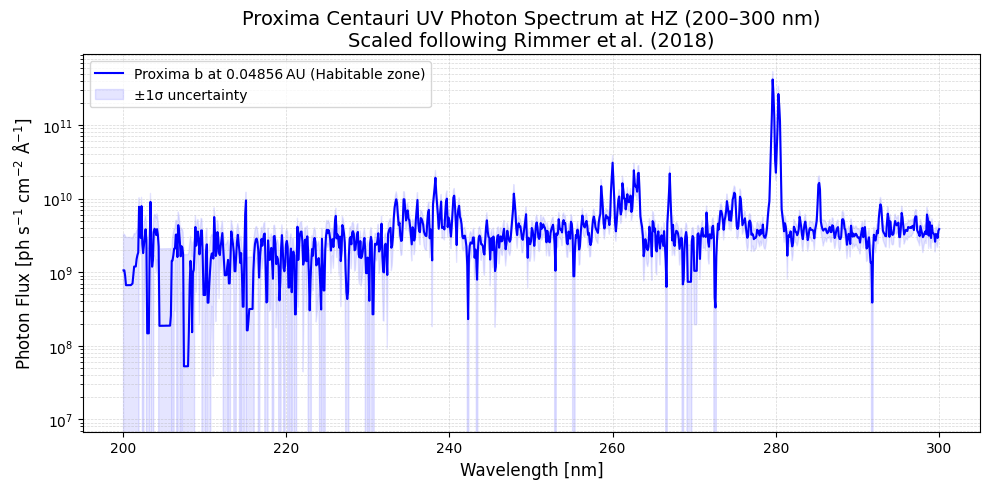

In [8]:
# # --- 1. Load the MUSCLES spectrum at Earth ---
# filename = "hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits"
# with fits.open(filename) as hdulist:
#     data = hdulist[1].data

w_ang = data['WAVELENGTH']          # Å
flux_erg = data['FLUX']             # erg s^-1 cm^-2 Å^-1
err_erg  = data['ERROR']            # erg s^-1 cm^-2 Å^-1

# convert to nm & cm
w_nm = w_ang / 10.0
w_cm = w_ang * 1e-8

# convert to photon flux at Earth: S_lambda,⊕ (photons cm^-2 s^-1 Å^-1)
hc_ergcm = (h * c).to('erg cm').value
S_earth = (flux_erg * w_cm) / hc_ergcm
S_earth_err = (err_erg * w_cm) / hc_ergcm

# --- 2. Scale to planet orbit at a = 0.04856 AU ---
# Proxima distance from Earth:
d_pc = Distance(parallax=768.5*u.mas).to(u.pc)  # or Distance("1.295 pc")
d_cm = d_pc.to(u.cm).value

a_AU = 0.04856 * u.AU
a_cm = a_AU.to(u.cm).value

scale = (d_cm / a_cm)**2
S_planet = S_earth * scale
S_planet_err = S_earth_err * scale

# --- 3. Filter to 200–300 nm and plot ---
mask = (w_nm >= 200) & (w_nm <= 300)
wl_plot = w_nm[mask]
planet_flux = S_planet[mask]
planet_err  = S_planet_err[mask]

plt.figure(figsize=(10,5))
plt.plot(wl_plot, planet_flux, color='blue',
         label=f'Proxima b at 0.04856 AU (Habitable zone)')
plt.fill_between(wl_plot,
                 planet_flux - planet_err,
                 planet_flux + planet_err,
                 color='blue', alpha=0.1,
                 label='±1σ uncertainty')

plt.xlabel("Wavelength [nm]", fontsize=12)
plt.ylabel("Photon Flux [ph s$^{-1}$ cm$^{-2}$ Å$^{-1}$]", fontsize=12)
plt.title("Proxima Centauri UV Photon Spectrum at HZ (200–300 nm)\n" +
          "Scaled following Rimmer et al. (2018)", fontsize=14)
plt.yscale("log")
plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

this is version 2.2, Rimmer et 2018 uses version 2.1, therefore slight differences are seen in the photon flux

# Lamp integrated flux

In [11]:
def integrated_photon_flux(wavelength_nm, photon_flux, wl_min=210, wl_max=250):
    """
    Integrate the photon flux between wl_min and wl_max (in nm)
    using the trapezoidal rule, and print the bolometric photon flux
    in units of photons cm^-2 s^-1.
    """
    # select the band
    mask = (wavelength_nm >= wl_min) & (wavelength_nm <= wl_max)
    wl_band = wavelength_nm[mask]
    flux_band = photon_flux[mask]
    
    # integrate: note that flux is per Å, but wavelength axis is in nm
    # Convert wl axis to Å for proper units: 1 nm = 10 Å
    wl_A = wl_band * 10.0
    integrated = np.trapz(flux_band, wl_A)
    
    print(f"Integrated photon flux from {wl_min}–{wl_max} nm: {integrated:.3e} photons cm^-2 s^-1")
    return integrated

# example of usage, after you have w_nm and S_planet defined ---
integrated_photon_flux(w_nm, S_planet)


Integrated photon flux from 210–250 nm: 1.223e+12 photons cm^-2 s^-1


1222802855663.9482

./irradiance_scaling\20250626_maya_irradiance_AbsoluteIrradiance_FlareLab_15-59-21-999.txt
./irradiance_scaling\AbsoluteIrradiance_D2lamp_18-39-34-948.txt
./irradiance_scaling\FlareLab_AbsoluteSpectrum_26052025_AbsoluteIrradiance_13-14-57-397.txt


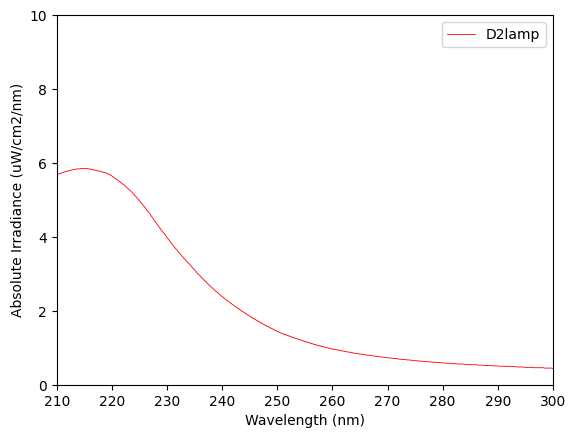

In [12]:
skip = 40

for file in glob.glob('./irradiance_scaling/*.txt'): 
    print(file)
    # if "FlareLab" and '20250626' in file:
        # x, absirr_flarelab_recent = np.loadtxt(file,skiprows=skip,usecols=(0,1),unpack=True)
    # if "FlareLab" and '26052025' in file:
        # x, absirr_flarelab_old = np.loadtxt(file,skiprows=skip,usecols=(0,1),unpack=True)
    if "D2lamp" in file:
        x, absirr_d2 = np.loadtxt(file,skiprows=skip,usecols=(0,1),unpack=True)
    # print(f"Background: {file}, I_background.shape = {I_background.shape}")
    
        
# plt.plot(x, absirr_flarelab_recent,'b-', lw=0.6, label='FlareLab 26/06')
# plt.plot(x, absirr_flarelab_old,'g-', lw=0.6, label='FlareLab 26/05')
plt.plot(x, absirr_d2 ,'r-', lw=0.6, label='D2lamp')

plt.xlim(210,300)
plt.xlabel('Wavelength (nm)')
plt.ylim(0,10)
plt.ylabel('Absolute Irradiance (uW/cm2/nm)')
plt.legend()

In [13]:
def load_d2_spectrum(path, skip=40):
    """Load wavelength (nm) and absolute irradiance (μW/cm²/nm)."""
    wl, irr = np.loadtxt(path, skiprows=skip, usecols=(0,1), unpack=True)
    return wl, irr

def integrated_photon_flux_nm(wl_nm, irr_uw, wl_min=None, wl_max=None):
    """
    Compute integrated photon flux [photons cm⁻² s⁻¹] from a spectrum
    given in wl_nm (nm) and irr_uw (μW cm⁻² nm⁻¹).
    
    Optionally restrict integration to wl_min–wl_max (nm).
    """
    # Convert irradiance to W cm⁻² nm⁻¹
    irr_W = irr_uw * 1e-6
    
    # Photon flux density φ(λ) = I(λ) * λ / (h c)
    #   I in W cm⁻² nm⁻¹, λ in m → φ in photons cm⁻² s⁻¹ nm⁻¹
    # Convert λ to meters
    wl_m = wl_nm * 1e-9
    hc = (h * c).to('J m').value
    phi = irr_W * wl_m / hc
    
    # Restrict band if requested
    if wl_min is not None or wl_max is not None:
        mask = np.ones_like(wl_nm, bool)
        if wl_min is not None:
            mask &= (wl_nm >= wl_min)
        if wl_max is not None:
            mask &= (wl_nm <= wl_max)
        wl_nm = wl_nm[mask]
        phi   = phi[mask]
    
    # Integrate φ(λ) dλ over λ in nm → result in photons cm⁻² s⁻¹
    integrated = np.trapz(phi, wl_nm)
    return integrated

# ——— Example usage ———
# find your D2 lamp file:
for file in glob.glob('./irradiance_scaling/*.txt'):
    if "D2lamp" in file:
        wl, irr = load_d2_spectrum(file)
        break

# compute total photon flux from 200–300 nm:
total_photons = integrated_photon_flux_nm(wl, irr, wl_min=210, wl_max=250)
print(f"Integrated photon flux (210–250 nm) at 10 cm: {total_photons:.3e} photons cm⁻² s⁻¹")

Integrated photon flux (210–250 nm) at 10 cm: 1.780e+14 photons cm⁻² s⁻¹


# Figure showing system HZ and UWLPZ??? work in progress

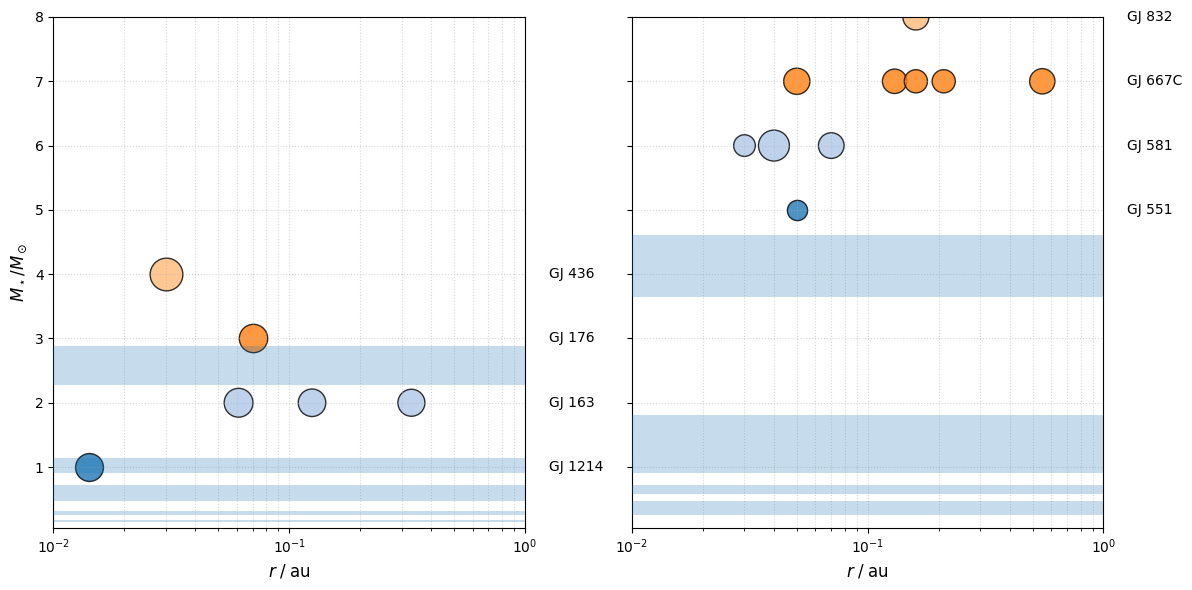

In [33]:
# Catalog of M dwarf stars

# systems = {
#     "GJ 1214":    {"Mstar": 0.178,  "r": [0.01411],                             "Mp": [8.17]},
#     "GJ 163":     {"Mstar": 0.30,   "r": [0.061, 0.125, 0.33],                  "Mp": [10, 7.6, 6.8]},
#     "GJ 176":     {"Mstar": 0.50,   "r": [0.07],                                "Mp": [9.1]},
#     "GJ 436":     {"Mstar": 0.41,   "r": [0.03],                                "Mp": [21.4]},
#     "GJ 551":     {"Mstar": 0.1221, "r": [0.05],                                "Mp": [1.2]},     # Proxima b
#     "GJ 581":     {"Mstar": 0.31,   "r": [0.03, 0.04, 0.07],                    "Mp": [1.8, 15.3, 5]}, # e, b, c
#     "GJ 667C":    {"Mstar": 0.33,   "r": [0.050, 0.13, 0.16, 0.21, 0.55],       "Mp": [5.7, 3.7, 2.7, 2.7, 4.6]},
#     "GJ 832":     {"Mstar": 0.45,   "r": [0.16, 3.67],                         "Mp": [5.4, 0.7]},
#     # "GJ 849":     {"Mstar": 0.45,   "r": [2.32, 4.95],                          "Mp": [283.9, 314.7]},
#     # "LHS 678-39": {"Mstar": 0.29,   "r": [],                                    "Mp": []},        # no confirmed planets
#     # "TRAPPIST-1": {"Mstar": 0.089,  "r": [0.0115,0.0158,0.0223,0.0292,0.0385,0.0490,0.0610],
#                                       # "Mp":[1.02, 1.16, 0.66, 0.77, 0.93, 1.14, 1.16]},
#     # "V-Eps Eri":  {"Mstar": 0.82,   "r": [3.39],                                "Mp": [248.0]},    # ε Eri b ≃0.78 MJup ≃248 M⊕
# }

# Split into halves
names = list(systems.keys())
mid   = len(names)//2
left_keys, right_keys = names[:mid], names[mid:]

fig, (axL, axR) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for ax, keys in zip((axL, axR), (left_keys, right_keys)):
    # 1) pale‑blue histogram of all r's behind
    r_all = np.hstack([systems[k]["r"] for k in keys if systems[k]["r"]])
    ax_hist = ax.twinx()
    ax_hist.hist(r_all,
                 bins=np.logspace(-2, 1, 30),
                 orientation='horizontal',
                 color='C0', alpha=0.25)
    ax_hist.set_ylim(0, 1)           # we'll rescale it below
    ax_hist.set_yticks([])           # hide its ticks
    ax_hist.set_frame_on(False)
    ax_hist.set_xlim(0, 1)           # no horizontal span

    # 2) scatter each system’s planets
    for i, name in enumerate(keys):
        Mstar = systems[name]["Mstar"]
        r_list = systems[name]["r"]
        Mp_list= systems[name]["Mp"]
        if not r_list:
            continue

        # color from tab20
        color = plt.cm.tab20(i % 20)
        sizes = np.array(Mp_list)**(1/3) * 200    # scale ∝ m^(1/3)
        ax.scatter(r_list,
                   [Mstar]*len(r_list),
                   s=sizes,
                   color=color,
                   edgecolor='k',
                   alpha=0.8)

        # label system on right
        ax.text(1.05, Mstar, name,
                va='center', ha='left',
                transform=ax.get_yaxis_transform(),
                fontsize=10)

    # 3) formatting
    ax.set_xscale('log')
    ax.set_xlim(1e-2, 10**np.log10(1))  # up to 1 au; change max if you have wider orbits
    ax.set_xlabel(r"$r\;/\;\mathrm{au}$", fontsize=12)
    ax.grid(True, which='both', ls=':', alpha=0.5)

# shared y‑axis label & ticks
axL.set_ylabel(r"$M_\star/M_\odot$", fontsize=12)
axL.set_ylim(0.05, 0.85)
yticks = sorted({systems[n]["Mstar"] for n in names})
axL.set_yticks(yticks)

plt.tight_layout()
plt.show()
